<a href="https://colab.research.google.com/github/zSoftwareRepository/MDS556/blob/main/Beginner's_Guide_to_Linear_Regression_Extended(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
#Mount google drive - step 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "drive/MyDrive/Elmhurst_Data/WW2_Weather.csv"
dataset = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
dataset.shape

(119040, 31)

In [6]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


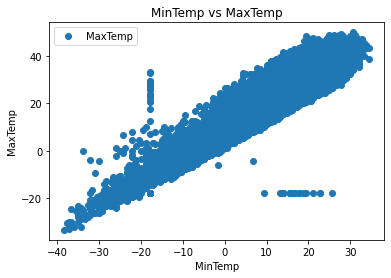

In [7]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


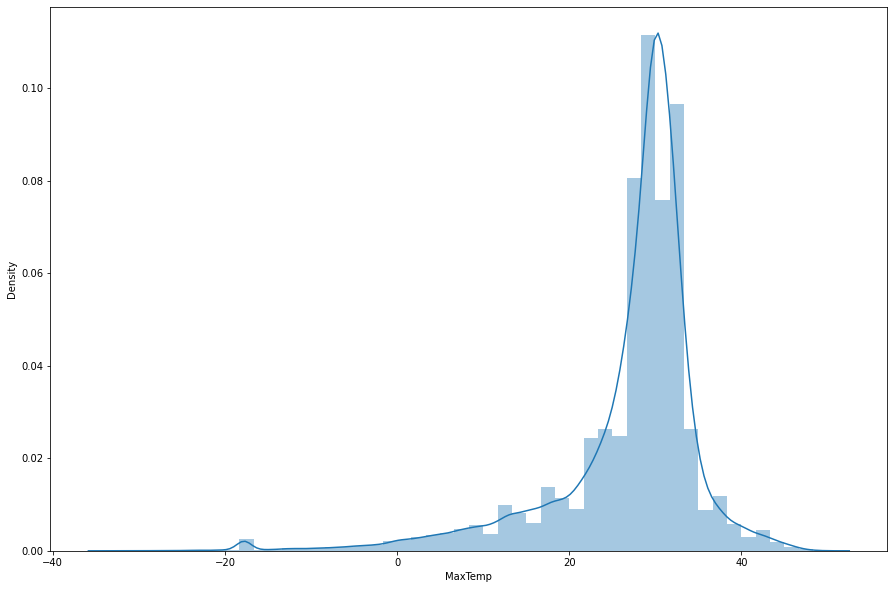

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [9]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [12]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

#To retrieve R^2 - Coefficient of Determination
print(regressor.score(X_train,y_train))


[10.66185201]
[[0.92033997]]
0.7726816262390883


In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Residual': (y_test - y_pred).flatten()})
df

,Actual,Predicted,Residual
0,28.888889,33.670351,-4.781462
1,31.111111,30.091251,1.019860
2,27.222222,26.512151,0.710071
3,28.888889,31.113851,-2.224962
4,23.333333,15.774852,7.558482
...,...,...,...
23803,32.777778,32.136451,0.641327
23804,32.222222,29.068651,3.153571
23805,31.111111,32.647751,-1.536640
23806,31.111111,30.602551,0.508560


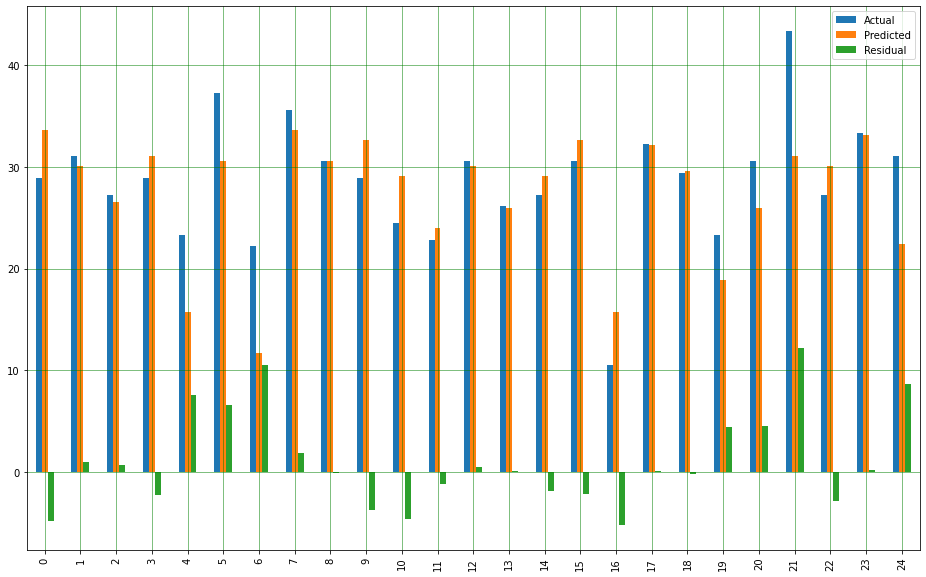

In [15]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

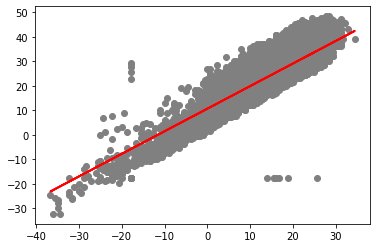

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Text(0, 0.5, 'Residual')

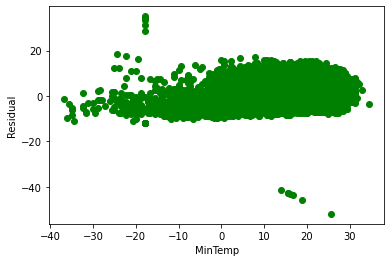

In [17]:
plt.scatter(X_test,(y_test-y_pred), color  = 'green')
plt.xlabel('MinTemp')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

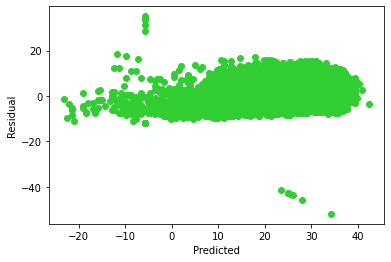

In [18]:
plt.scatter((y_pred),(y_test-y_pred), color = 'limegreen')
plt.xlabel('Predicted')
plt.ylabel('Residual')

(array([1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.100e+01,
        4.780e+02, 4.419e+03, 8.863e+03, 5.928e+03, 2.535e+03, 1.140e+03,
        3.040e+02, 3.700e+01, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00]),
 array([-51.95942893, -48.4752841 , -44.99113927, -41.50699444,
        -38.02284961, -34.53870478, -31.05455995, -27.57041512,
        -24.08627029, -20.60212546, -17.11798063, -13.63383579,
        -10.14969096,  -6.66554613,  -3.1814013 ,   0.30274353,
          3.78688836,   7.27103319,  10.75517802,  14.23932285,
         17.72346768,  21.20761251,  24.69175734,  28.17590217,
         31.660047  ,  35.14419184]),
 <a list of 25 Patch objects>)

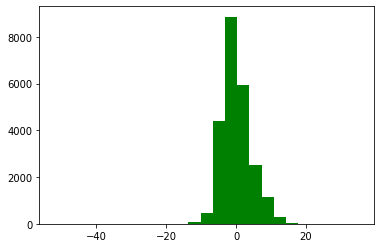

In [19]:
plt.hist(y_test - y_pred, bins=25, color = 'green')

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


In [21]:
dataset['Precip'].head(20)

0     1.016
1         0
2      2.54
3      2.54
4         0
5         0
6         T
7     3.556
8         T
9     3.556
10        0
11    0.508
12        0
13        0
14        0
15        T
16        T
17        T
18        0
19        0
Name: Precip, dtype: object

In [22]:
dataset['Precip'] = (dataset['Precip'].replace(['T'],0)).astype(float)

In [23]:
dataset['Precip'].head(20)

0     1.016
1     0.000
2     2.540
3     2.540
4     0.000
5     0.000
6     0.000
7     3.556
8     0.000
9     3.556
10    0.000
11    0.508
12    0.000
13    0.000
14    0.000
15    0.000
16    0.000
17    0.000
18    0.000
19    0.000
Name: Precip, dtype: float64

In [24]:
Xm = dataset[['MinTemp','Precip']].values.reshape(-1,2)
ym = dataset['MaxTemp'].values.reshape(-1,1)

In [25]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=0)

In [26]:
regressorm = LinearRegression()  
regressorm.fit(Xm_train, ym_train) #training the algorithm

LinearRegression()

In [27]:
#To retrieve the intercept:
print(regressorm.intercept_)

#For retrieving the slope:
print(regressorm.coef_)

#To retrieve R^2
print(regressorm.score(Xm_train,ym_train))

[10.73145111]
[[ 0.92713546 -0.05904356]]
0.7780528920202426


In [28]:
ym_pred = regressorm.predict(Xm_test)

In [29]:
dfm = pd.DataFrame({'Actual': ym_test.flatten(), 'Predicted': ym_pred.flatten(), 'Residual': (ym_test - ym_pred).flatten()})
dfm

,Actual,Predicted,Residual
0,28.888889,33.909838,-5.020949
1,31.111111,30.304311,0.806800
2,27.222222,26.218878,1.003344
3,28.888889,30.224679,-1.335790
4,23.333333,15.882204,7.451130
...,...,...,...
23803,32.777778,32.364612,0.413166
23804,32.222222,29.274160,2.948062
23805,31.111111,32.879687,-1.768576
23806,31.111111,30.789392,0.321719


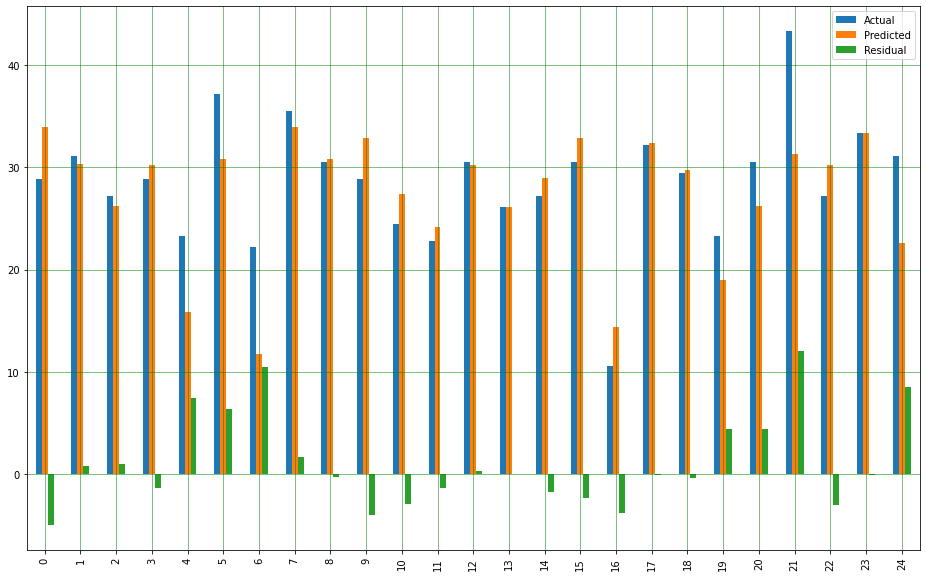

In [30]:
df1m = dfm.head(25)
df1m.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

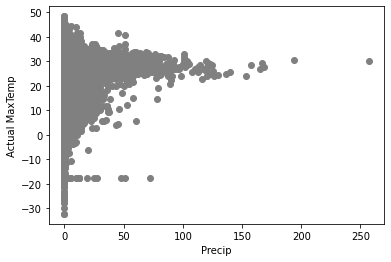

Text(0, 0.5, 'Actual MaxTemp')

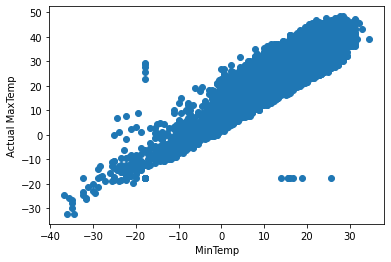

In [31]:
plt.scatter(Xm_test[:,1], ym_test,  color='gray')
plt.xlabel('Precip')
plt.ylabel('Actual MaxTemp')
plt.show()
plt.subplot(1,1,1)
plt.scatter(Xm_test[:,0], ym_test)
plt.xlabel('MinTemp')
plt.ylabel('Actual MaxTemp')

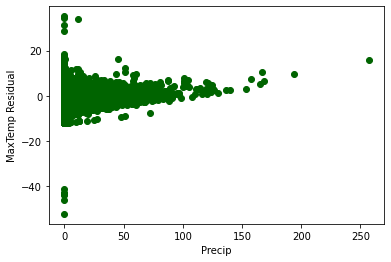

Text(0, 0.5, 'MaxTemp Residual')

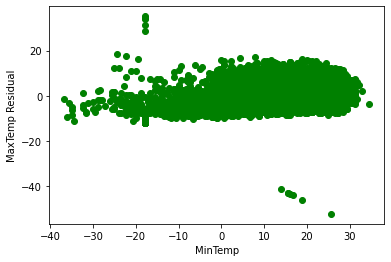

In [32]:
plt.scatter(Xm_test[:,1],(ym_test-ym_pred), color = 'darkgreen')
plt.xlabel('Precip')
plt.ylabel('MaxTemp Residual')
plt.show()
plt.subplot(1,1,1)
plt.scatter(Xm_test[:,0],(ym_test-ym_pred), color  = 'green')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp Residual')

Text(0, 0.5, 'Residual')

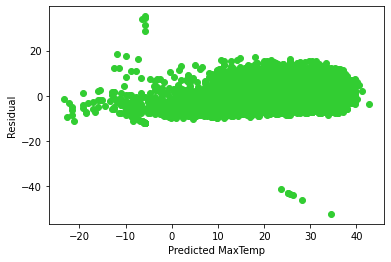

In [33]:
plt.scatter((ym_pred),(ym_test-ym_pred), color = 'limegreen')
plt.xlabel('Predicted MaxTemp')
plt.ylabel('Residual')

(array([1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.800e+01,
        4.290e+02, 4.272e+03, 8.785e+03, 6.201e+03, 2.581e+03, 1.118e+03,
        2.870e+02, 3.400e+01, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00]),
 array([-52.2026907 , -48.70676701, -45.21084332, -41.71491963,
        -38.21899594, -34.72307225, -31.22714856, -27.73122487,
        -24.23530118, -20.73937749, -17.2434538 , -13.74753011,
        -10.25160642,  -6.75568273,  -3.25975904,   0.23616465,
          3.73208834,   7.22801203,  10.72393572,  14.21985941,
         17.7157831 ,  21.21170679,  24.70763048,  28.20355417,
         31.69947786,  35.19540155]),
 <a list of 25 Patch objects>)

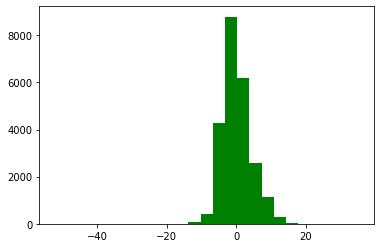

In [34]:
plt.hist(ym_test - ym_pred, bins=25, color = 'green')

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ym_test, ym_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ym_test, ym_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ym_test, ym_pred)))

Mean Absolute Error: 3.1603695565248358
Mean Squared Error: 17.211877731566375
Root Mean Squared Error: 4.148720011228328


In [36]:
print('Original Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Original Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Original Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Original Mean Absolute Error: 3.19932917837853
Original Mean Squared Error: 17.631568097568447
Original Root Mean Squared Error: 4.198996082109204


An Alternative Approach - Statsmodels

In [37]:
import statsmodels.api as sm
from scipy import stats

In [38]:
Xm2_train = sm.add_constant(Xm_train)

In [39]:
regressorm2 = sm.OLS(ym_train,Xm2_train)

In [40]:
modelfit2m = regressorm2.fit()

In [41]:
print(modelfit2m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.669e+05
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:18:47   Log-Likelihood:            -2.6971e+05
No. Observations:               95232   AIC:                         5.394e+05
Df Residuals:                   95229   BIC:                         5.395e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7315      0.031    341.265      0.0

In [42]:
Xm2_test = sm.add_constant(Xm_test)

In [43]:
ypred2m = (modelfit2m.predict(Xm2_test)).reshape(-1,1)

In [44]:
df2m = pd.DataFrame({'Actual': ym_test.flatten(), 'Predicted': ypred2m.flatten(), 'Residual': (ym_test - ypred2m).flatten()})
df2m

,Actual,Predicted,Residual
0,28.888889,33.909838,-5.020949
1,31.111111,30.304311,0.806800
2,27.222222,26.218878,1.003344
3,28.888889,30.224679,-1.335790
4,23.333333,15.882204,7.451130
...,...,...,...
23803,32.777778,32.364612,0.413166
23804,32.222222,29.274160,2.948062
23805,31.111111,32.879687,-1.768576
23806,31.111111,30.789392,0.321719
